In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(2)

In [8]:
# # remove duplicates
# df = df.drop_duplicates()

In [9]:
# df.duplicated().sum()


In [10]:
# ploting histograms

cols =df.select_dtypes(include=np.number)
cols.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

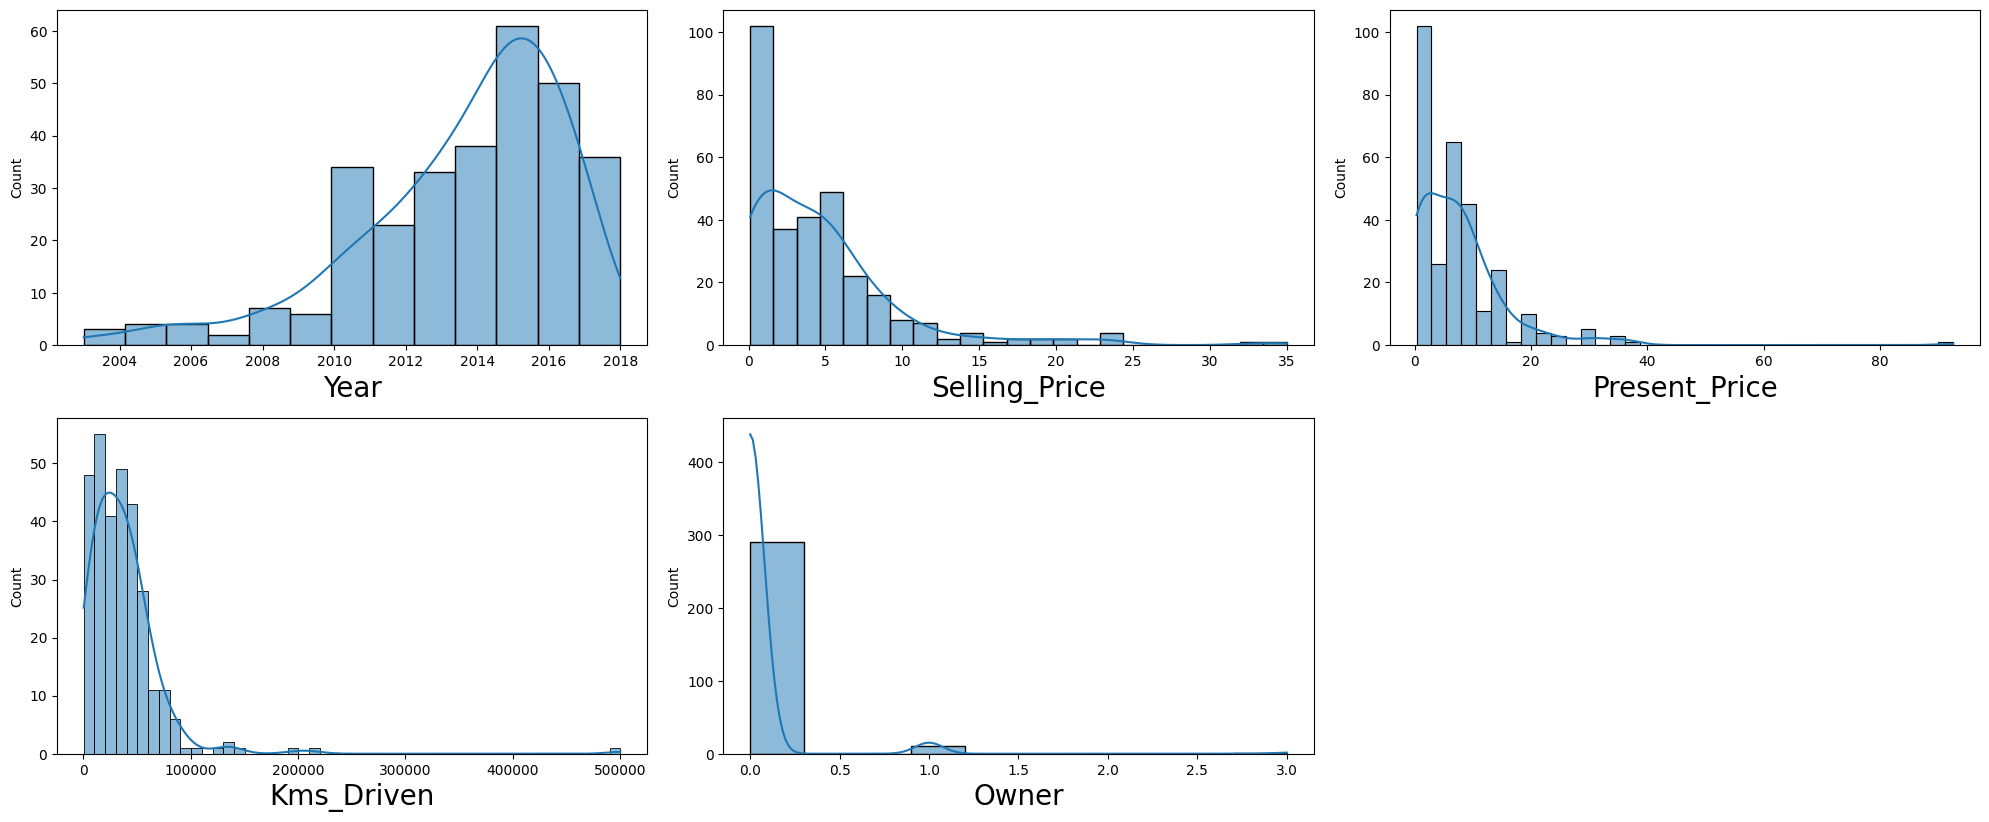

In [11]:
plt.figure(figsize=(20,20))
plotnumber = 1
for column in cols:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        sns.histplot(df[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [12]:
# handlinh outliers
outlier_cols = df.select_dtypes(include=np.number)
outlier_cols.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [13]:
outlier_cols = ['Year', 'Selling_Price', 'Kms_Driven', 'Present_Price']

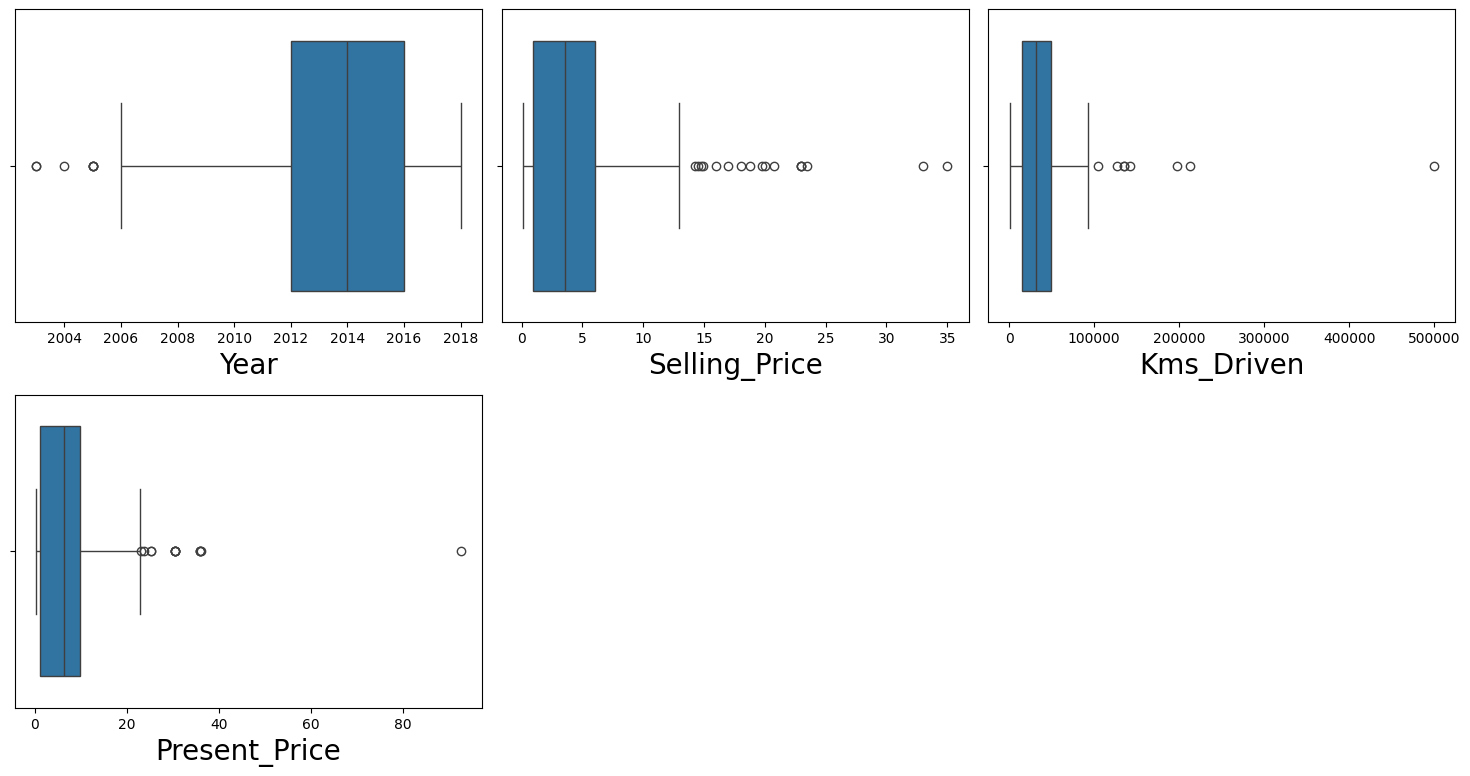

In [14]:
plt.figure(figsize=(15,15))
plotnumber = 1
for column in outlier_cols:
    if plotnumber <= 15:
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(x=column, data=df)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [15]:
def remove_outlier_iqr(data,column):
    q1,q2,q3 = np.percentile(data[column],[25,50,75])
    print("q1,q2,q3:",q1,q2,q3)
    IQR = q3 - q1
    print("IQR is:",IQR)
    lower_limit = q1 - (1.5 * IQR)
    upper_limit = q3 + (1.5 * IQR)
    data[column] = np.where(data[column]>upper_limit,upper_limit,data[column])
    data[column] = np.where(data[column]<lower_limit,lower_limit,data[column])

In [16]:
for column in outlier_cols:
    remove_outlier_iqr(df,column)

q1,q2,q3: 2012.0 2014.0 2016.0
IQR is: 4.0
q1,q2,q3: 0.9 3.6 6.0
IQR is: 5.1
q1,q2,q3: 15000.0 32000.0 48767.0
IQR is: 33767.0
q1,q2,q3: 1.2 6.4 9.9
IQR is: 8.700000000000001


FEATURE ENGINEERING

In [17]:
df.drop(columns=['Car_Name'],inplace=True)

In [18]:
from datetime import datetime
current_year = datetime.now().year
current_year

2025

In [19]:
df['Car_Age'] = current_year - df['Year']
df.drop(columns=['Year'],inplace=True)

In [20]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0,11.0
1,4.75,9.54,43000.0,Diesel,Dealer,Manual,0,12.0
2,7.25,9.85,6900.0,Petrol,Dealer,Manual,0,8.0
3,2.85,4.15,5200.0,Petrol,Dealer,Manual,0,14.0
4,4.60,6.87,42450.0,Diesel,Dealer,Manual,0,11.0


Categorical Data

In [21]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [22]:
df["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [23]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [24]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler

### Label Encoder

In [26]:
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Transmission'] = le.fit_transform(df['Transmission'])
df = pd.get_dummies(df,columns=['Seller_Type'],drop_first=True)

In [27]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission,Owner,Car_Age,Seller_Type_Individual
0,3.35,5.59,27000.0,2,1,0,11.0,False
1,4.75,9.54,43000.0,1,1,0,12.0,False
2,7.25,9.85,6900.0,2,1,0,8.0,False
3,2.85,4.15,5200.0,2,1,0,14.0,False
4,4.60,6.87,42450.0,1,1,0,11.0,False


In [28]:
# scaler = StandardScaler()
# num_cols = df.select_dtypes(include=np.number).columns
# num_cols
# num_cols = num_cols.drop('Selling_Price')
# scaler.fit(df[num_cols])
# df[num_cols] = scaler.transform(df[num_cols])
# df.head()

### Feature Selection

<Axes: >

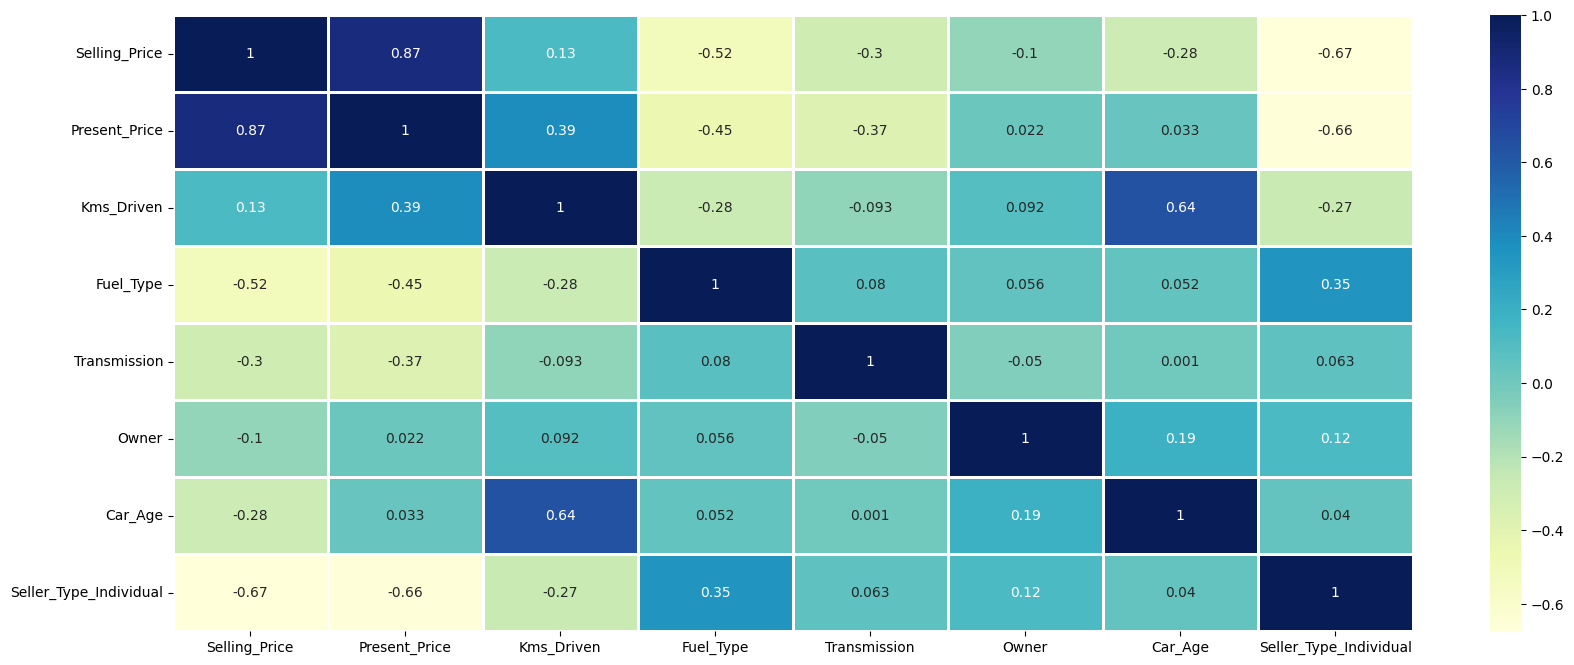

In [29]:
correlation = df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(correlation,annot=True,linewidth=2,cmap='YlGnBu')


In [30]:
# splitting data into dependent and independent columns
X = df.drop(columns=['Selling_Price'],axis=1)
y = df['Selling_Price']


### Scaling

In [31]:
normalizer = MinMaxScaler()
x = normalizer.fit_transform(X)
x= pd.DataFrame(x)
x.describe()


,0,1,2,3,4,5,6
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,0.298567,0.342979,0.893688,0.867110,0.014396,0.361019,0.352159
std,0.272315,0.239861,0.212901,0.340021,0.082638,0.230678,0.478439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.038886,0.146587,1.000000,1.000000,0.000000,0.166667,0.000000
50%,0.268670,0.318447,1.000000,1.000000,0.000000,0.333333,0.000000
75%,0.423332,0.487952,1.000000,1.000000,0.000000,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### TRAIN TEST SPLIT

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.33)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
# prediction
y_pred = lr_model.predict(x_test)
y_pred

array([ 0.85460238,  8.83260985,  5.83722796, -1.44548979, 10.14351315,
        6.7145395 ,  1.36414312,  0.94895286,  1.33023179,  6.90151699,
        8.5481894 ,  0.66772494,  6.99035279,  1.38130742,  6.31069228,
        2.87322084,  0.73473038, 11.74010075,  1.69913522,  2.43090694,
        0.51873332,  7.5194148 ,  6.13869008,  2.78911987,  0.81994031,
        3.85460632,  5.51577105,  2.90611936,  2.14769537,  1.77667804,
        0.50426082,  8.77270887, -0.46261215,  2.54749911,  7.972238  ,
        4.58197259,  7.78899584,  8.66355361,  2.71156883,  9.06861252,
        5.08548316,  3.7484277 ,  4.44998243,  0.5429029 ,  6.65365659,
        0.54080046,  7.89498277, 10.54958187,  3.10131024,  4.5907007 ,
        5.10184481,  2.22284851, 13.44339325, 14.41210542,  6.75245023,
        8.23522236,  4.56078666,  8.48384324,  2.23918441,  5.80296205,
        0.24611707, -2.18585025,  1.96395971, -1.41649866,  4.77908265,
        1.8779714 , 13.19865588, 13.51963557,  5.64023275, -0.75

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [38]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [39]:
mae

1.0292563658001561

In [40]:
mse

2.0234164098663863

In [41]:
r2


0.8640790135680989

### Polynomial Regression

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [43]:
poly_model = LinearRegression()
poly_model.fit(x_train_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
y_pred = poly_model.predict(x_test_poly)

print("Polynomial Regression (Degree 2):")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Polynomial Regression (Degree 2):
MSE: 1.039689261867702
R²: 0.9301599070924581


### Check Over Fittting and Under fitting

In [45]:
y_pred_train = lr_model.predict(x_train)
y_pred_test = lr_model.predict(x_test)

In [46]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [47]:
print(r2_train)
print(r2_test)

0.8903177955567082
0.8640790135680989


In [48]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=1.0)
ridge.fit(x_train,y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [49]:
y_train_pred_ridge = ridge.predict(x_train)
y_test_pred_ridge = ridge.predict(x_test)

In [50]:
from sklearn.metrics import mean_squared_error
mse_train_ridge = mean_squared_error(y_train,y_train_pred_ridge)
mse_test_ridge = mean_squared_error(y_test,y_test_pred_ridge)

### SVR

In [51]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print('MSE :',mse_svr)
print('SVR :',r2_svr)
print('R2 SCORE:',r2)

MSE : 1.9640127983072506
SVR : 0.8680693921384043
R2 SCORE: 0.8640790135680989


In [52]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mse

0.7681295763999998

In [53]:
r2 = r2_score(y_test, y_pred)
r2

0.948401659083757

In [54]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
y_pred = adb.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mse

1.2204139456481549

In [55]:
r2 = r2_score(y_test, y_pred)
r2

0.9180199060663448

In [57]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor 
from xgboost import XGBRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)

r2 = r2_score(y_test, y_pred)
print(r2)

XGB = XGBRegressor()
XGB.fit(x_train,y_train)
y_pred = XGB.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)

r2 = r2_score(y_test, y_pred)
print(r2)

0.7141891863999996
0.9520250511752572
0.6677487337490642
0.9551446424288814


In [58]:
AB = AdaBoostRegressor()
AB.fit(x_train,y_train)
y_pred = AB.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)

r2 = r2_score(y_test, y_pred)
r2

1.365446906847394


0.9082774610336676